# **Multicollinearity**
Author: Moamen Abdelkawy

## **Definition and Description**

In a multiple regression model:

$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_kX_k + \varepsilon$

where:
- $(Y)$ is the dependent variable,
- $(X_1, X_2, ..., X_k)$ are the independent variables,
- $(\beta_0)$ is the intercept,
- $(\beta_1, \beta_2, ..., \beta_k)$ are the coefficients of the independent variables,
- $(\varepsilon)$ is the error term, representing the portion of $(Y)$ not explained by the model.

**Multicollinearity occurs when**

$|\rho_{X_i, X_j}| = 1\;\; \text{or close to 1}$

for any two independent variables $X_i$, $X_j$.

Multicollinearity arise in multiple regression models, when two or more of the independent variables are highly correlated (Gujarati, 68) [[1]](https://www.bloomsbury.com/us/econometrics-by-example-9781137375018/). This means that one predictor variable can be linearly predicted from the others.

The rare case of $|\rho_{X_i, X_j}| = 1$ is called ***Perfect Multicollinearity***, that is, a perfect linear relationship between the two variables. It is not possible to estimate the regression coefficients in such case (Bahovec, 869) [[2]](https://link.springer.com/referenceworkentry/10.1007/978-3-642-04898-2_382).

A more common type is ***Imperfect multicollinearity***, where independent variables are highly (but not perfectly) correlated. This often arises when using economic time series data (Bahovec, 869). Estimating the regression coefficients is still possible in imperfect multicollinearity. The remainder of this analysis will focus on imperfect multicollinearity.

## **Demonstration Using Real-World Data**

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.iolib.summary2 import summary_col
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


### **Data Gathering and Assessment**

To demonstrate multicollinearity the report analyzes a dataset of Egyptian macroeconomic indicators between 2007-2021. Data was extracted from the [World Bank Global Economic Monitor (GEM)](https://databank.worldbank.org/source/global-economic-monitor-(gem)).

In [2]:
# Read the data from the excel file into a DataFrame
egypt_macroeconomic = pd.read_excel("data_egypt.xlsx", index_col=0).dropna()

# Display the first few rows of the DataFrame
display(egypt_macroeconomic.head())


,"GDP at market prices, current US$, millions, seas. adj.","Unemployment Rate, seas. adj.",Total Reserves,"CPI Price, nominal, seas. adj.","Exchange rate, new LCU per USD extended backward, period average","Exports Merchandise, Customs, current US$, millions, seas. adj.","Foreign Reserves, Months Import Cover, Goods","Imports Merchandise, Customs, current US$, millions, seas. adj.","Industrial Production, constant 2010 US$, seas. adj.",Real Effective Exchange Rate,"Core CPI, seas. adj."
Year,,,,,,,,,,,
2007,166250.4,8.998381,31717.0,71.01662,5.644951,22274.53,1.171996,27062.38,6.920000e+10,73.49052,75.36743
2008,206118.0,8.707039,34163.0,84.06647,5.436565,26372.69,0.647364,52772.49,7.540000e+10,82.34372,89.63739
2009,232241.5,9.393224,34209.0,94.03715,5.552551,31063.30,0.763381,44812.47,7.670000e+10,94.56050,97.27377
2010,266001.8,8.983811,36038.0,104.44770,5.633609,29223.88,0.682153,52829.78,8.040000e+10,99.99291,104.11350
2011,278892.0,11.996660,18141.0,114.98040,5.943931,29107.86,0.292156,62093.56,7.660000e+10,97.02863,112.73950


In [3]:
# DataFrame info
egypt_macroeconomic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 2007 to 2021
Data columns (total 11 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   GDP at market prices, current US$, millions, seas. adj.           15 non-null     float64
 1   Unemployment Rate, seas. adj.                                     15 non-null     float64
 2   Total Reserves                                                    15 non-null     float64
 3   CPI Price, nominal, seas. adj.                                    15 non-null     float64
 4   Exchange rate, new LCU per USD extended backward, period average  15 non-null     float64
 5   Exports Merchandise, Customs, current US$, millions, seas. adj.   15 non-null     float64
 6   Foreign Reserves, Months Import Cover, Goods                      15 non-null     float64
 7   Imports Merchandise, Customs, cu

### **Multicollinearity Diagnosis and Visualization**

Multicollinearity can be diagnosed using multiple methods [[3]](http://article.sciappliedmathematics.com/pdf/ajams-8-2-1.pdf). This report will focus on four methods:
1. Pairwise Correlation Coefficients
2. Variance Inflation Factor (VIF)
3. Pairwise Scatterplot
4. Condition Number

#### **1. Pairwise Correlation Coefficients**

The most straight-forward approach to detect multicollinearity is by examining Pearson’s correlation coefficients between the independent variables. These can be visualized using a heat map.

In [4]:
# Calculate the correlation matrix of the DataFrame
correlation_matrix = egypt_macroeconomic.corr()

# Display the correlation matrix
display(correlation_matrix)


,"GDP at market prices, current US$, millions, seas. adj.","Unemployment Rate, seas. adj.",Total Reserves,"CPI Price, nominal, seas. adj.","Exchange rate, new LCU per USD extended backward, period average","Exports Merchandise, Customs, current US$, millions, seas. adj.","Foreign Reserves, Months Import Cover, Goods","Imports Merchandise, Customs, current US$, millions, seas. adj.","Industrial Production, constant 2010 US$, seas. adj.",Real Effective Exchange Rate,"Core CPI, seas. adj."
"GDP at market prices, current US$, millions, seas. adj.",1.000000,-0.079074,0.042355,0.734558,0.468866,0.521023,-0.558242,0.832664,0.565648,0.736758,0.709889
"Unemployment Rate, seas. adj.",-0.079074,1.000000,-0.872249,-0.377977,-0.354702,-0.631379,-0.680866,0.126334,-0.235717,0.238152,-0.350198
Total Reserves,0.042355,-0.872249,1.000000,0.572725,0.665901,0.633208,0.621392,0.028092,0.480881,-0.412066,0.571581
"CPI Price, nominal, seas. adj.",0.734558,-0.377977,0.572725,1.000000,0.937836,0.666835,-0.147942,0.744618,0.768577,0.154371,0.998154
"Exchange rate, new LCU per USD extended backward, period average",0.468866,-0.354702,0.665901,0.937836,1.000000,0.578342,0.005273,0.607451,0.754815,-0.150187,0.953025
"Exports Merchandise, Customs, current US$, millions, seas. adj.",0.521023,-0.631379,0.633208,0.666835,0.578342,1.000000,0.090819,0.453260,0.650618,0.083116,0.648276
"Foreign Reserves, Months Import Cover, Goods",-0.558242,-0.680866,0.621392,-0.147942,0.005273,0.090819,1.000000,-0.724221,-0.307225,-0.641207,-0.156547
"Imports Merchandise, Customs, current US$, millions, seas. adj.",0.832664,0.126334,0.028092,0.744618,0.607451,0.453260,-0.724221,1.000000,0.796846,0.484516,0.749201
"Industrial Production, constant 2010 US$, seas. adj.",0.565648,-0.235717,0.480881,0.768577,0.754815,0.650618,-0.307225,0.796846,1.000000,0.125868,0.782665
Real Effective Exchange Rate,0.736758,0.238152,-0.412066,0.154371,-0.150187,0.083116,-0.641207,0.484516,0.125868,1.000000,0.125435


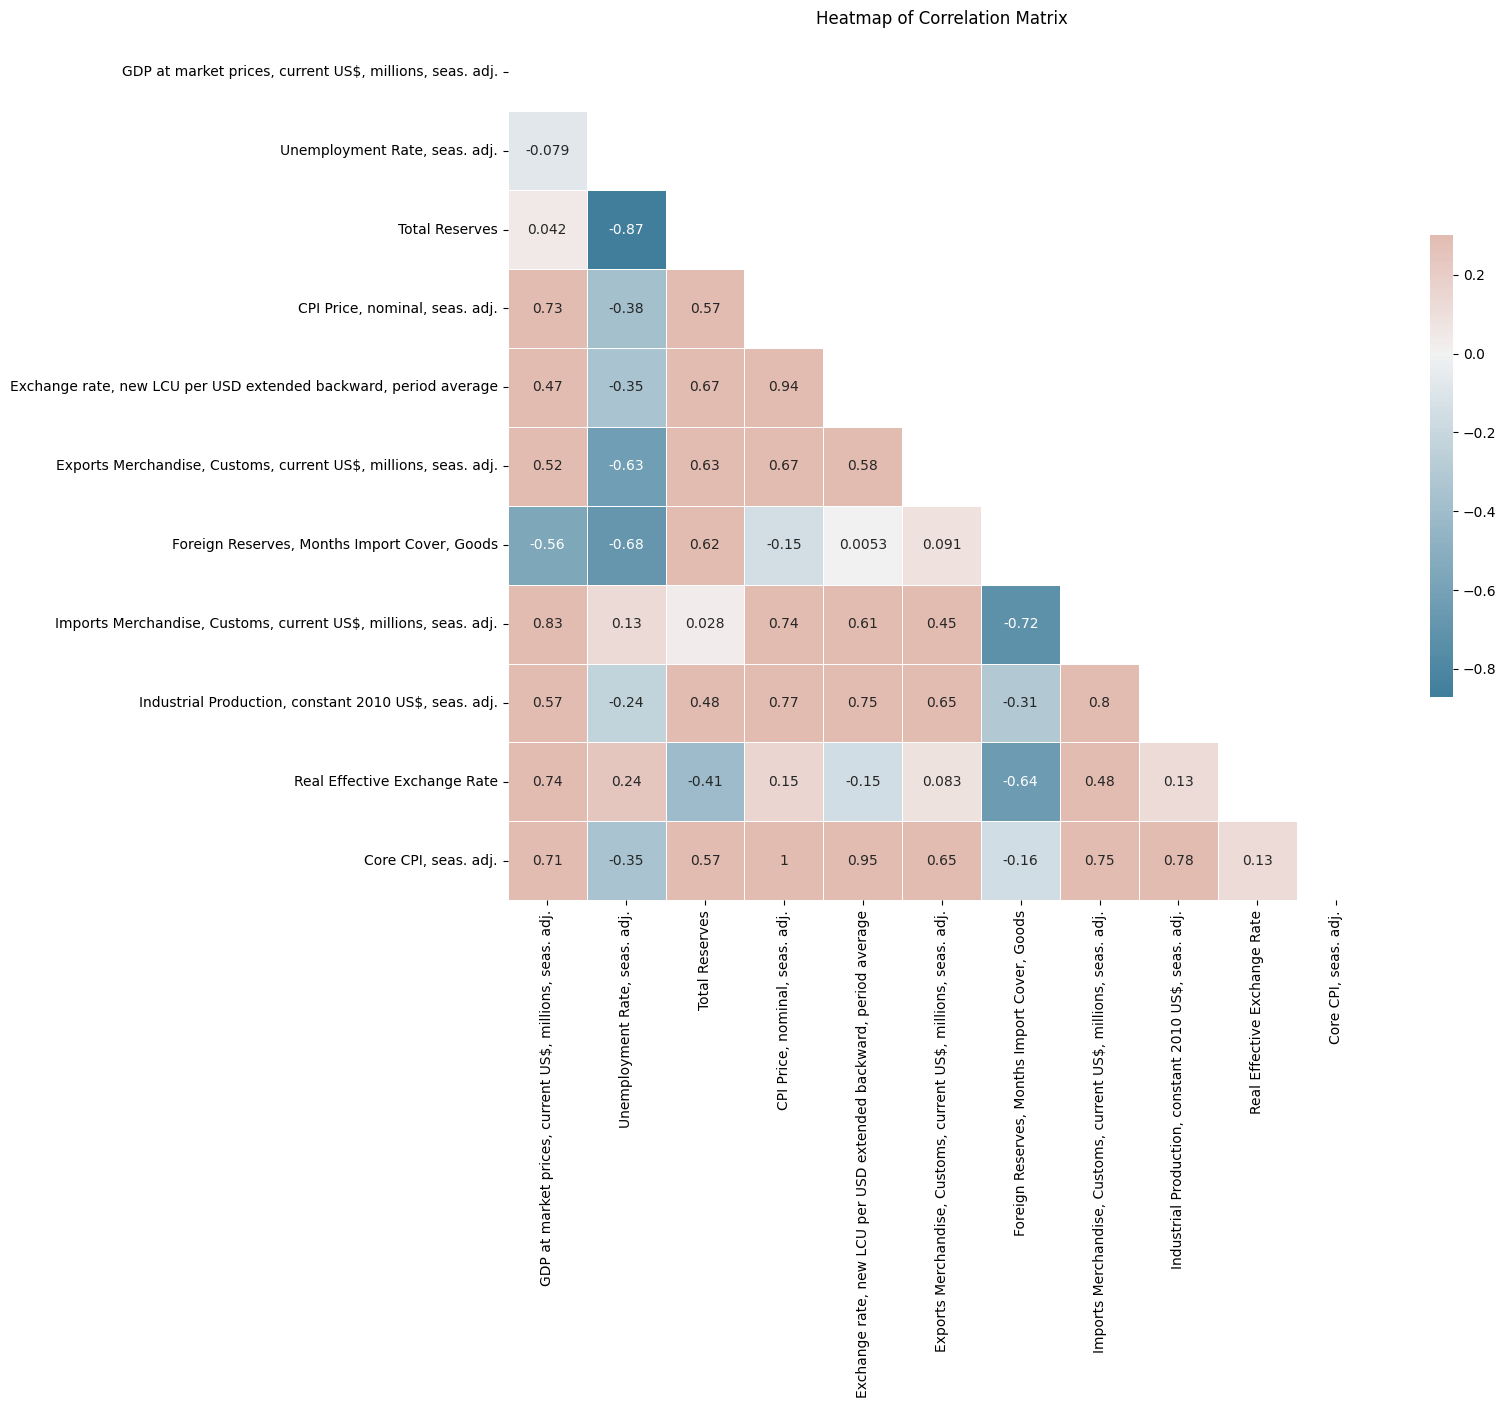

In [5]:
# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a figure and set its size
plt.figure(figsize=(14, 12))

# Create a diverging color palette for the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Set the title of the heatmap
plt.title('Heatmap of Correlation Matrix')

# Show the plot
plt.show()


The correlation matrix indicates several instances of strong linear correlation between two independent variables in this dataset.

#### **2. Variance Inflation Factor (VIF)**

VIF is a measure of the degree to which the variance of the OLS estimator is inflated because of multicollinearity (Gujarati, 70) [[1]](https://www.bloomsbury.com/us/econometrics-by-example-9781137375018/).

VIF is calculated with the formula:
$$VIF = \frac{1}{1-R^2}$$

VIF > 10 indicates significant multicollinearity [[3]](http://article.sciappliedmathematics.com/pdf/ajams-8-2-1.pdf), which can be seen in almost all independent variables in this dataset.

In [6]:
# Drop the dependent variable
independent_variables_df = egypt_macroeconomic.drop(columns=["GDP at market prices, current US$, millions, seas. adj."])

def calculate_vif(X_df):
    """
    Calculate the Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    - X_df (DataFrame): The DataFrame containing the independent variables.

    Returns:
    DataFrame: A DataFrame with two columns: "Variable" and "VIF".
              The "Variable" column contains the names of the variables,
              and the "VIF" column contains the corresponding VIF values.
    """
    # Add a constant column to the DataFrame
    X_const = add_constant(X_df)

    # Create an empty DataFrame to store the VIF values
    vif_data = pd.DataFrame()

    # Calculate the VIF for each variable (skip the constant column)
    vif_data["Variable"] = X_const.columns[1:]
    vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(1, X_const.shape[1])]

    return vif_data

# Calculate the VIF for the independent variables
vif_data = calculate_vif(independent_variables_df)

# Print the VIF data
print(vif_data.sort_values("VIF", ascending=False))


                                            Variable           VIF
9                               Core CPI, seas. adj.  11691.125466
2                     CPI Price, nominal, seas. adj.   9007.815473
3  Exchange rate, new LCU per USD extended backwa...    351.778153
1                                     Total Reserves    105.710154
0                      Unemployment Rate, seas. adj.     81.276614
6  Imports Merchandise, Customs, current US$, mil...     47.741860
5       Foreign Reserves, Months Import Cover, Goods     27.415909
7  Industrial Production, constant 2010 US$, seas...     13.446147
8                       Real Effective Exchange Rate     10.977214
4  Exports Merchandise, Customs, current US$, mil...      4.115163


#### **3. Pairwise Scatterplot**

A Pairwise Scatterplot is a mtrix of scatter plots that provides a visual methos to examine the linear relationships between pairs of independent variables.

In [7]:
# Select the variables with the highest VIF scores
high_vif = vif_data.sort_values("VIF", ascending=False)[:5]['Variable'].to_list()

# Display the variables with high VIF scores
display(high_vif)

['Core CPI, seas. adj.',
 'CPI Price, nominal, seas. adj.',
 'Exchange rate, new LCU per USD extended backward, period average',
 'Total Reserves',
 'Unemployment Rate, seas. adj.']

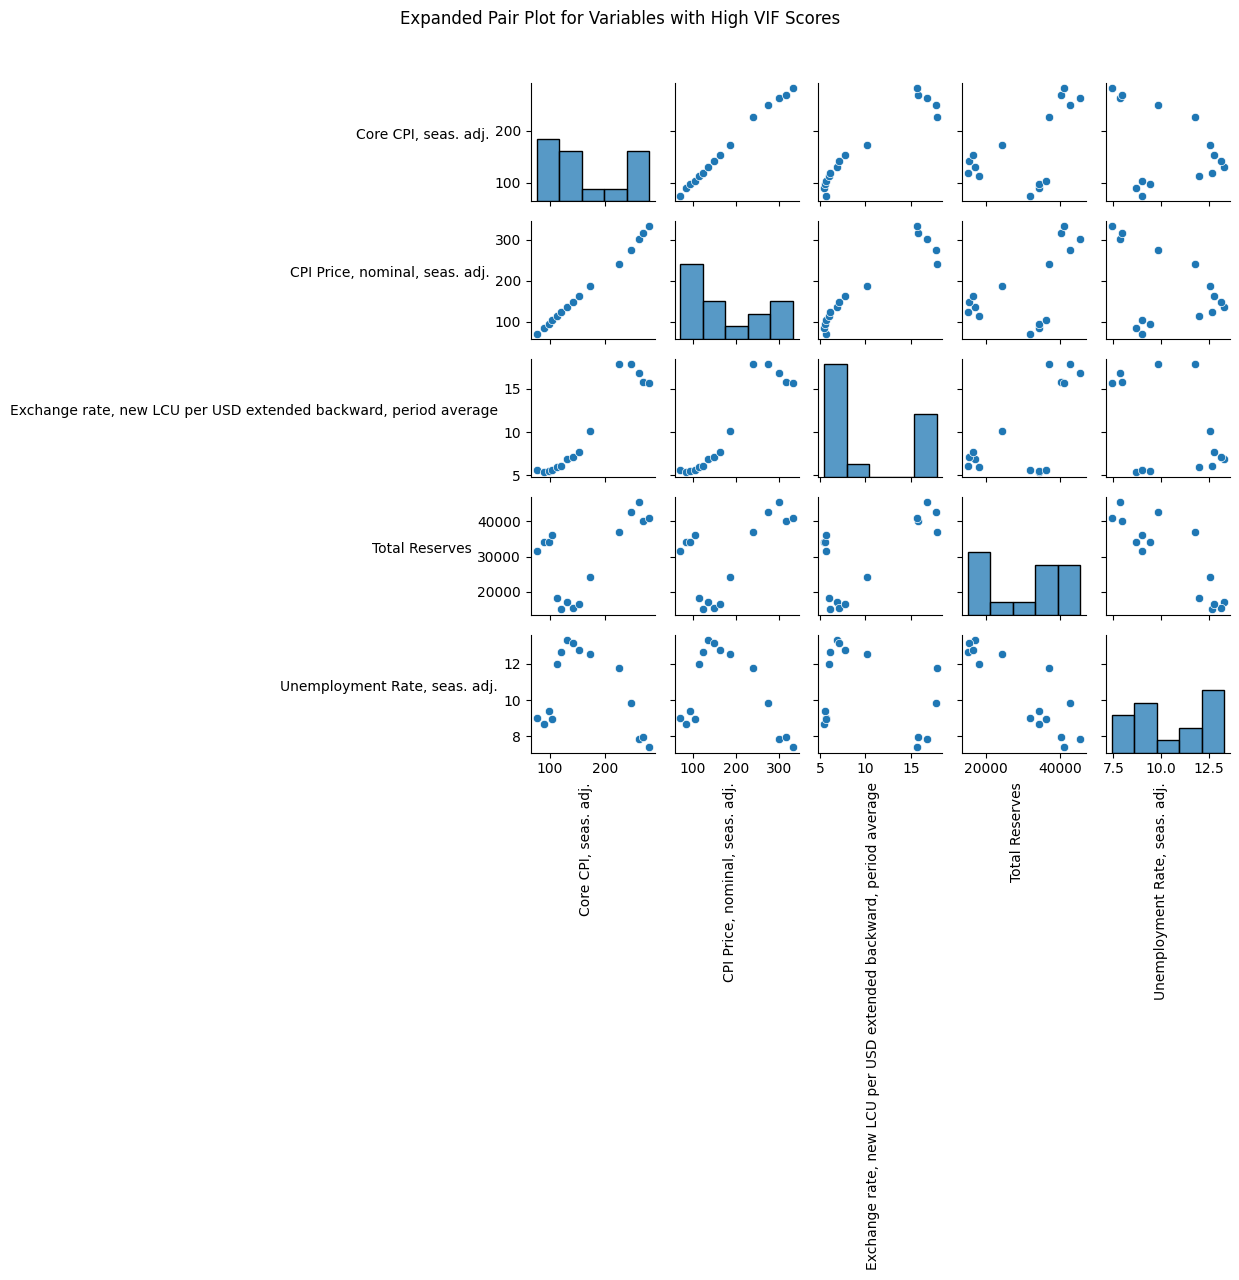

In [8]:
# Create a pair plot of the variables with high VIF scores
pair_plot = sns.pairplot(independent_variables_df[high_vif])
plt.suptitle('Expanded Pair Plot for Variables with High VIF Scores', y=1.02)

# Rotate the x-axis and y-axis labels for better visibility
for ax in pair_plot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=90, ha='right')
    ax.set_ylabel(ax.get_ylabel(), rotation=0, ha='right')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

For clarity, this Pairwise Scatterplot includes the five independent variables with the highest VIF scores. many plots clearly indicate a strong linear relationship.

#### **4. Condition Number**

The condition number of the correlation matrix can be used to measure the overall multicollinearity of the variables [[3]](http://article.sciappliedmathematics.com/pdf/ajams-8-2-1.pdf). The easiest way to get this number is by examining `statsmodels` _"OLS Regression Results"_. A condition number > 20 is the benchmark for a problematic dataset (Greene, 232) [[4]](https://www.pearson.com/en-us/subject-catalog/p/econometric-analysis/P200000005909/9780134811932).

## **Damage**

To illustrate the effects of multicollinearity, an OLS model will be applied on the raw dataset. Keeping in mind that all dignostic measures indicated the presence of strong multicollinearity.

In [9]:
# Add a constant column to the independent variables DataFrame
X = add_constant(independent_variables_df)

# Select the dependent variable
y = egypt_macroeconomic["GDP at market prices, current US$, millions, seas. adj."]

# Fit an Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Generate a summary of the model
model_summary = model.summary()

# Print the model summary
print(model_summary)


                                               OLS Regression Results                                              
Dep. Variable:     GDP at market prices, current US$, millions, seas. adj.   R-squared:                       0.996
Model:                                                                 OLS   Adj. R-squared:                  0.986
Method:                                                      Least Squares   F-statistic:                     100.3
Date:                                                     Thu, 14 Mar 2024   Prob (F-statistic):           0.000234
Time:                                                             18:22:28   Log-Likelihood:                -147.81
No. Observations:                                                       15   AIC:                             317.6
Df Residuals:                                                            4   BIC:                             325.4
Df Model:                                                               

### **Consequences of Multicollinearity**
1. Wide confidence intervals for regression coefficients.
2. Because of the previous point, the t ratios of some coefficients tend to be statistically insignificant. In this dataset, all coefficients are insignificant.
3. $R^2$ can still be very high even with insignificant coefficients.
4. A high condition number, indicating that the coefficients and their standard errors are sensitive to small changes in the data.

(Gujarati, 69) [[1]](https://www.bloomsbury.com/us/econometrics-by-example-9781137375018/)

## **Direction**

This report presents two approaches to remedy multicollinearity:
1. Removing independent Variables with High VIF Scores
2. Using Principal Component Analysis (PCA)

### **1. Removing independent Variables with High VIF Scores**

This approach aims to reduce multicollinearity by iteratively removing variables with high VIF scores. After each iteration, VIF scores are recalculated. The process continues untill all VIF scores are below a certain threshhold (10 in this specific model).

In [10]:
def reduce_multicollinearity(X_df, threshold=10):
    """
    Reduce multicollinearity in a DataFrame by iteratively removing variables with high VIF scores.

    Parameters:
    - X_df (DataFrame): The DataFrame containing the independent variables.
    - threshold (float): The threshold above which a VIF score is considered high.

    Returns:
    DataFrame: The DataFrame with reduced multicollinearity.
    """
    while True:
        # Calculate the VIF for the current DataFrame
        vif_data = calculate_vif(X_df)
        max_vif = vif_data["VIF"].max()

        if max_vif > threshold:
            # Identify the variable with the highest VIF
            max_vif_var = vif_data.loc[vif_data["VIF"] == max_vif, "Variable"].iloc[0]

            # Drop the variable from the DataFrame
            X_df = X_df.drop(columns=[max_vif_var])
            print(f"Removed {max_vif_var} with VIF of {max_vif}")
        else:
            break

    return X_df

# Remove independent variables with high VIF
X_adjusted = reduce_multicollinearity(independent_variables_df, threshold=10)

# Add a constant to the model (intercept)
X_adjusted_const = sm.add_constant(X_adjusted)

# Fit the regression model with the adjusted set of independent variables
adjusted_model = sm.OLS(y, X_adjusted_const).fit()

# Display the summary of the adjusted regression model
adjusted_model_summary = adjusted_model.summary()
print(adjusted_model_summary)


Removed Core CPI, seas. adj. with VIF of 11691.125466037354
Removed Exchange rate, new LCU per USD extended backward, period average with VIF of 215.75854071277223
Removed Imports Merchandise, Customs, current US$, millions, seas. adj. with VIF of 42.71902915211102
Removed Total Reserves with VIF of 23.36495884948983
                                               OLS Regression Results                                              
Dep. Variable:     GDP at market prices, current US$, millions, seas. adj.   R-squared:                       0.961
Model:                                                                 OLS   Adj. R-squared:                  0.932
Method:                                                      Least Squares   F-statistic:                     32.81
Date:                                                     Thu, 14 Mar 2024   Prob (F-statistic):           3.27e-05
Time:                                                             18:22:28   Log-Likelihood:         

In [11]:
# View VIF scores for the final adjusted model
calculate_vif(X_adjusted)

,Variable,VIF
0,"Unemployment Rate, seas. adj.",6.241113
1,"CPI Price, nominal, seas. adj.",2.903351
2,"Exports Merchandise, Customs, current US$, mil...",3.323596
3,"Foreign Reserves, Months Import Cover, Goods",7.444558
4,"Industrial Production, constant 2010 US$, seas...",3.830591
5,Real Effective Exchange Rate,2.444904


For this dataset, this approach was not very successful to eliminate multicollinearity. The VIF scores are all low and some coefficients are now significant. Yet the condition number is still very high, indicating remaining multicollinearity issues despite the removal of some variables.

Even though this approach may be less effective in addressing multicollinearity, its main advantage is that it still allows for direct interpretation of the effects of individual variables on the dependent variable, assuming multicollinearity could be sufficiently reduced. If interpretability of specific variables is crucial, using this approach with additional steps to address multicollinearity (e.g., transformations) is advised.

### **2. Principal Component Analysis (PCA)**

Principal Component Analysis (PCA) is a dimension reduction tool used to reduce a large set of correlated independent variables to a smaller, less correlated set,  that still contains most of the information in the original data [[5]](https://www.whitman.edu/Documents/Academics/Mathematics/2017/Perez.pdf). By design, this approach is effective in addressing multicollinearity.

In [12]:
# Applying PCA to solve multicollinearity

# Independent variables
X = independent_variables_df
# Dependent variable
y = egypt_macroeconomic['GDP at market prices, current US$, millions, seas. adj.']

# Standardizing the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=0.95) # Adjust based on variance ratio
X_pca = pca.fit_transform(X_scaled) # X_pca can be used as the new set of independent variables

# Adding a constant for intercept
X_pca_const = sm.add_constant(X_pca)

# Fit PCA model
pca_model = sm.OLS(y, X_pca_const).fit()

# Display the summary of the PCA model
print(pca_model.summary())


                                               OLS Regression Results                                              
Dep. Variable:     GDP at market prices, current US$, millions, seas. adj.   R-squared:                       0.957
Model:                                                                 OLS   Adj. R-squared:                  0.940
Method:                                                      Least Squares   F-statistic:                     56.00
Date:                                                     Thu, 14 Mar 2024   Prob (F-statistic):           8.25e-07
Time:                                                             18:22:28   Log-Likelihood:                -165.62
No. Observations:                                                       15   AIC:                             341.2
Df Residuals:                                                           10   BIC:                             344.8
Df Model:                                                               

This approach proved to be more successful with this dataset. The condition number is drastically low (3.59) which indicates that multicollinearity has been effectively addressed, and all coefficients are significant. Adjusted R-squared is very high (0.940), indicating efficient data representation with fewer components. If the primary goal is prediction and addressing multicollinearity, PCA is an effective approach.

The main drawback of PCA approach is the loss of direct interpretability, as there is no guarantee that the new dimensions are interpretable after dimension reduction [[5]](https://www.whitman.edu/Documents/Academics/Mathematics/2017/Perez.pdf).

## **References**

1. Gujarati, Damodar. “Regression diagnostic I: multicollinearity.” Econometrics by Example. Chapter 4.
2. Bahovec, V. “Multicollinearity.” International Encyclopedia of Statistical Science, edited by M. Lovric, Springer, 2011.
3. Shrestha, Noora. “Detecting Multicollinearity in Regression Analysis.” American Journal of Applied Mathematics and Statistics, vol. 8, no. 2, 2020, pp. 39-42.
4. Greene, W. (2012) Econometric Analysis. 7th Edition, Prentice Hall, Upper Saddle River.
5. Perez, Lexi V. “Principal Component Analysis to Address Multicollinearity.” Whitman College, 2017.
